<center><h1>Tuwaiq Academy</h1></center>
<center><h2>Data Science and Machine Learning Bootcamp</h2></center>
<center><h2>Usecase 8 - Project 5: Niceone Makeup</h2></center>

# Introduction 
Nice One is a leading Saudi company in the e-commerce sector, occupying a leading position in the field of beauty in the Gulf and the Middle East, by providing a wide range of beauty, care and perfume products.

Ramadan Mubarak! Are you looking to buy new makeup products for Eid? Or maybe you're a beginner wanting to learn how to wear makeup without spending too much on your first products? Whatever brought you here, rest assured—you’re in the right place!

Whether you’re searching for low-cost makeup products, affordable makeup products or tools, or luxury makeup products, we’ve got you covered.

## Problem Statement

Customers often struggle to find makeup products that fit their budget and preferences. This project aims to use K-means clustering to group makeup products based on price, discount price, makeup type, brand name, and review count, helping users discover low-cost, affordable, and luxury options more easily.


# Dataset

This dataset was scraped on March 7th, 2025, from the Niceone official website. It contains nine columns defined as follows:

- Original price: The product's price before any discount.
- Discount price: The price after the discount (if 0, no discount is applied).
- Name: The name of the product or tool.
- Brand name: The brand of the product.
- Rating number: The product's rating out of 5.
- Reviews number: The number of customer reviews.
- Skin type: The skin type suitable for the product.
- Makeup type: The category of makeup (e.g., foundation, lipstick). The value "Not Available" in this feature indicates that the product or tool does not have a specified makeup type.
- Texture: The product’s texture (e.g., liquid, powder). The value "Not Available" in this feature indicates that the product or tool does not have a specified texture. 

In [ ]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif




## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data

In [550]:
products_data = pd.read_csv('product_data_v2.csv')

### Viewing the dataframe


In [551]:
products_data

,name,brand_name,original_price,discounted_price,rating_number,reviews_number,makeup_type,skin_type,texture
0,كريم أساس لاستينج فينيش يدوم لمدة 35 ساعة من ر...,Rimmel London,72,54.00,4.9,13,ضد الماء - كريم أساس,Not Available,Not Available
1,مجموعة كونسيلر خافي ومصحح عيوب البشرة كونسيل ل...,essence,18.40,15.64,4.9,57,خافي عيوب,Not Available,كريمي
...,...,...,...,...,...,...,...,...,...
2295,ميبلين كولر سينسيشينال أحمر شفاه كريمي مات - ...,Maybelline,65.78,0.00,0,0,أحمر شفاه,Not Available,Not Available
2296,ميك اوفر22 احمر شفاه اتش دي كريمي - أخضر,Make Over 22,33.64,28.59,5,166,أحمر شفاه,Not Available,كريمي


In [542]:
products_data.shape

(2248, 9)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 

In this step, 7 dimensions are checked for Data quality as follows:

#### 1. Reliability:


The data source of this dataset is Nice One official website, proving its reliability.

#### 2. Timeliness: 


This data was scrapped in March 7th, 2025 which is the current period of interest for our problem. 

#### 3. Consistency: 


This data was collected from one source, proving its consistency. 

#### 4. Relevance: 

- The data is appropriate for the problem statement because it was collected specifically from the makeup section on Nice One website.

- We collected 9 essential features for the EDA and the model.

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [575]:
products_data.duplicated().sum()

132

In [576]:
products_data[products_data.duplicated(keep=False)]

,name,brand_name,original_price,discounted_price,rating_number,reviews_number,makeup_type,skin_type,texture
0,كريم أساس لاستينج فينيش يدوم لمدة 35 ساعة من ر...,Rimmel London,72,54.0,4.9,13,ضد الماء - كريم أساس,Not Available,Not Available
49,Not Available,Not Available,Not Available,0.0,Not Available,Not Available,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...
2262,Not Available,Not Available,Not Available,0.0,Not Available,Not Available,Not Available,Not Available,Not Available
2264,بودرة مضغوطة اليومية اتش دي بفيتامين E من كاتيا,Katia,42,0.0,5,2,بودرة تثبيت,Not Available,بودرة


These products are noraml duplicated values because they have different shades 

In [578]:
products_data['name'].duplicated().sum()

140

In [ ]:
# different shades/colors
products_data[products_data['name'].duplicated(keep=False)]

,name,brand_name,original_price,discounted_price,rating_number,reviews_number,makeup_type,skin_type,texture
0,كريم أساس لاستينج فينيش يدوم لمدة 35 ساعة من ر...,Rimmel London,72,54.0,4.9,13,ضد الماء - كريم أساس,Not Available,Not Available
49,Not Available,Not Available,Not Available,0.0,Not Available,Not Available,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...
2262,Not Available,Not Available,Not Available,0.0,Not Available,Not Available,Not Available,Not Available,Not Available
2264,بودرة مضغوطة اليومية اتش دي بفيتامين E من كاتيا,Katia,42,0.0,5,2,بودرة تثبيت,Not Available,بودرة


#### 6. Completeness: 


##### Checking for Missing Values

In [ ]:
products_data.isnull().sum()

name                0
brand_name          0
original_price      0
discounted_price    0
rating_number       0
reviews_number      0
makeup_type         0
skin_type           0
texture             0
dtype: int64

In [ ]:
# Rows that weren't collected correctly
products_data[products_data['name'] == 'Not Available']

,name,brand_name,original_price,discounted_price,rating_number,reviews_number,makeup_type,skin_type,texture
49,Not Available,Not Available,Not Available,0.0,Not Available,Not Available,Not Available,Not Available,Not Available
235,Not Available,Not Available,Not Available,0.0,Not Available,Not Available,Not Available,Not Available,Not Available
288,Not Available,Not Available,Not Available,0.0,Not Available,Not Available,Not Available,Not Available,Not Available
437,Not Available,Not Available,Not Available,0.0,Not Available,Not Available,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...
2134,Not Available,Not Available,Not Available,0.0,Not Available,Not Available,Not Available,Not Available,Not Available
2168,Not Available,Not Available,Not Available,0.0,Not Available,Not Available,Not Available,Not Available,Not Available
2241,Not Available,Not Available,Not Available,0.0,Not Available,Not Available,Not Available,Not Available,Not Available
2262,Not Available,Not Available,Not Available,0.0,Not Available,Not Available,Not Available,Not Available,Not Available


In [586]:
# after cleaning 
products_data[products_data['name'] == 'Not Available']

,name,brand_name,original_price,discounted_price,rating_number,reviews_number,makeup_type,skin_type,texture


#### 7. Check Accuracy:


##### Checking for data types

In [ ]:
# Found three incorrect data types (original_price, rating_number, reviews_number)
products_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2248 entries, 0 to 2296
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2248 non-null   object 
 1   brand_name        2248 non-null   object 
 2   original_price    2248 non-null   object 
 3   discounted_price  2248 non-null   float64
 4   rating_number     2248 non-null   object 
 5   reviews_number    2248 non-null   object 
 6   makeup_type       2248 non-null   object 
 7   skin_type         2248 non-null   object 
 8   texture           2248 non-null   object 
dtypes: float64(1), object(8)
memory usage: 175.6+ KB


In [590]:
# after cleaning
products_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2248 entries, 0 to 2296
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2248 non-null   object 
 1   brand_name        2248 non-null   object 
 2   original_price    2248 non-null   float64
 3   discounted_price  2248 non-null   float64
 4   rating_number     2248 non-null   float64
 5   reviews_number    2248 non-null   int32  
 6   makeup_type       2248 non-null   object 
 7   skin_type         2248 non-null   object 
 8   texture           2248 non-null   object 
dtypes: float64(3), int32(1), object(5)
memory usage: 166.8+ KB


##### Checking for Outliers

In [591]:
products_data.describe()

,original_price,discounted_price,rating_number,reviews_number
count,2248.000000,2248.000000,2248.000000,2248.000000
mean,80.563310,37.303652,4.133407,111.043594
std,68.945444,48.941885,1.828005,363.707452
min,9.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,4.900000,3.000000
50%,59.030000,21.250000,4.900000,20.000000
75%,98.000000,48.750000,5.000000,79.000000
max,793.500000,427.000000,5.000000,7849.000000


The most expensive product is a natural outlier. 

In [592]:
products_data.describe(include='object')

,name,brand_name,makeup_type,skin_type,texture
count,2248,2248,2248,2248,2248
unique,2156,122,85,19,41
top,كريم أساس لاستينج فينيش يدوم لمدة 35 ساعة من ر...,Topface,Not Available,Not Available,Not Available
freq,12,199,408,2022,595


In [ ]:
# Checking the most frequented name
# different shades/colors 
products_data[products_data['name'].str.contains('كريم أساس لاستينج فينيش', na=False)]

,name,brand_name,original_price,discounted_price,rating_number,reviews_number,makeup_type,skin_type,texture
0,كريم أساس لاستينج فينيش يدوم لمدة 35 ساعة من ر...,Rimmel London,72.0,54.0,4.9,13,ضد الماء - كريم أساس,Not Available,Not Available
116,كريم أساس لاستينج فينيش يدوم لمدة 35 ساعة من ر...,Rimmel London,72.0,54.0,4.9,13,ضد الماء - كريم أساس,Not Available,Not Available
241,كريم أساس لاستينج فينيش يدوم لمدة 35 ساعة من ر...,Rimmel London,72.0,54.0,4.9,13,ضد الماء - كريم أساس,Not Available,Not Available
245,كريم أساس لاستينج فينيش يدوم لمدة 35 ساعة من ر...,Rimmel London,72.0,54.0,4.9,13,ضد الماء - كريم أساس,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...
1698,كريم أساس لاستينج فينيش يدوم لمدة 35 ساعة من ر...,Rimmel London,72.0,54.0,4.9,13,ضد الماء - كريم أساس,Not Available,Not Available
1762,كريم أساس لاستينج فينيش يدوم لمدة 35 ساعة من ر...,Rimmel London,72.0,54.0,4.9,13,ضد الماء - كريم أساس,Not Available,Not Available
2037,كريم أساس لاستينج فينيش يدوم لمدة 35 ساعة من ر...,Rimmel London,72.0,54.0,4.9,13,ضد الماء - كريم أساس,Not Available,Not Available
2048,كريم أساس لاستينج فينيش يدوم لمدة 35 ساعة من ر...,Rimmel London,72.0,54.0,4.9,13,ضد الماء - كريم أساس,Not Available,Not Available


In [594]:
# Checking values for rating number
products_data['rating_number'].value_counts()

rating_number
5.0    1006
4.9     725
0.0     367
4.8     105
       ... 
4.5       8
4.0       4
4.3       1
4.4       1
Name: count, Length: 10, dtype: int64

In [ ]:
# products with zero rating number don't have any reviewers. 
products_data[(products_data['rating_number'] == 0.0) & (products_data['reviews_number'] == 0)]

,name,brand_name,original_price,discounted_price,rating_number,reviews_number,makeup_type,skin_type,texture
18,بيوتي كرييشنز برايمر فلاوليس ستاي جريب,Beauty Creations,55.00,41.25,0.0,0,برايمر,Not Available,جــل
23,احمر خدود سائل سويت بلاش من لوتي - موكا موف,Lottie,57.00,45.60,0.0,0,أحمر خدود,Not Available,سائل
32,اسفنجة مكياج للوجه من كي اس دي - 33,KSD,33.35,31.00,0.0,0,Not Available,Not Available,Not Available
34,كاتريس كريم أساس تينتد سيروم نود دروب,Catrice,34.99,29.75,0.0,0,كريم أساس,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...
2272,داسيك مجموعة كونتور محدد للوجه في كات بليندينغ...,Dasique,79.00,0.00,0.0,0,كنتور,Not Available,Not Available
2278,ريل تكنيك مجموعة اسفنج ميني ميركل كونسيلر بف -...,Real Techniques,110.00,0.00,0.0,0,Not Available,Not Available,Not Available
2288,كنتور محدد وجه ماتش ستيكس سكين ستيك من فنتي بي...,FENTY BEAUTY,146.00,0.00,0.0,0,كنتور,Not Available,كريمي
2295,ميبلين كولر سينسيشينال أحمر شفاه كريمي مات - ...,Maybelline,65.78,0.00,0.0,0,أحمر شفاه,Not Available,Not Available


## 2. Data Cleaning: 




### handling missing values

In [585]:
# dropping rows that weren't correctly collected 
products_data = products_data[products_data.name != 'Not Available']

### Correcting Data Type for Accuracy

In [588]:
products_data['original_price'] = products_data['original_price'].astype(float)
products_data['rating_number'] = products_data['rating_number'].astype(float)
products_data['reviews_number'] = products_data['reviews_number'].astype(int)

C:\Users\sakur\AppData\Local\Temp\ipykernel_25428\296629967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_data['original_price'] = products_data['original_price'].astype(float)
C:\Users\sakur\AppData\Local\Temp\ipykernel_25428\296629967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_data['rating_number'] = products_data['rating_number'].astype(float)
C:\Users\sakur\AppData\Local\Temp\ipykernel_25428\296629967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

## 3. Univariate Analysis: 


### 1. Univariate Graphical Analysis:


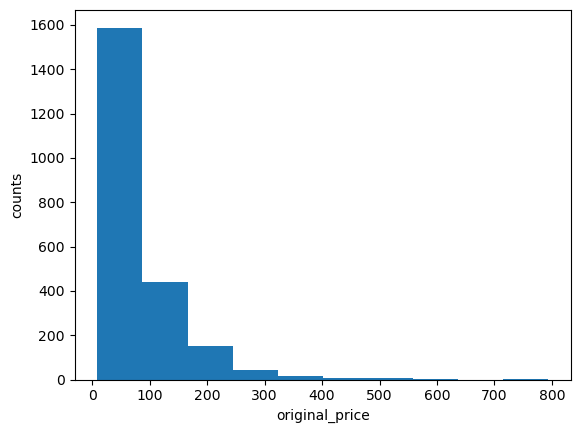

In [ ]:
plt.hist(products_data['original_price'])
plt.xlabel("original_price")
plt.ylabel('counts')
plt.show()

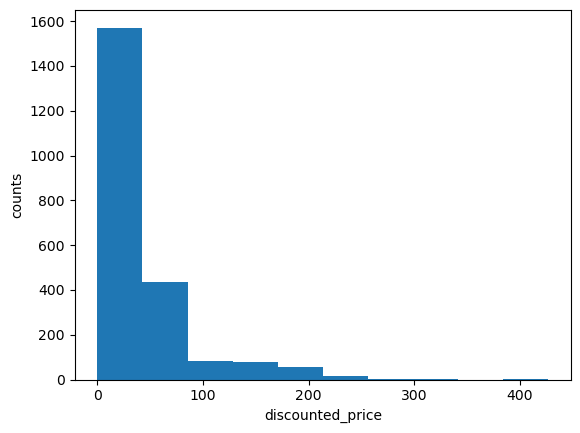

In [ ]:
plt.hist(products_data['discounted_price'])
plt.xlabel("discounted_price")
plt.ylabel('counts')
plt.show()

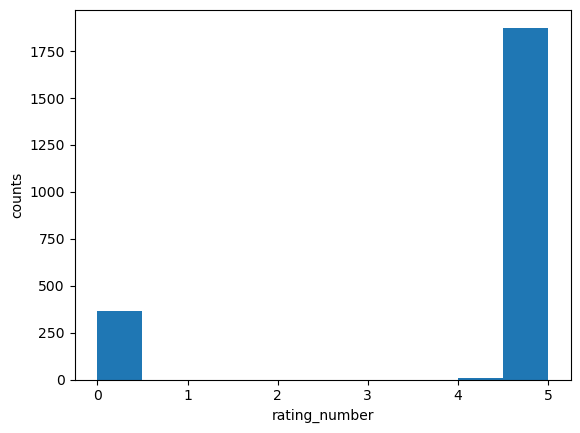

In [ ]:
plt.hist(products_data['rating_number'])
plt.xlabel("rating_number")
plt.ylabel('counts')
plt.show()

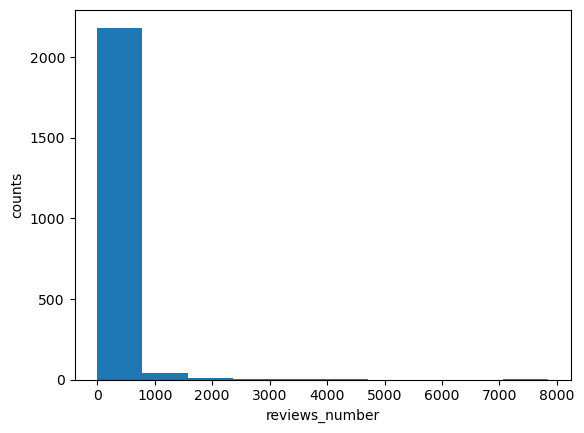

In [ ]:
plt.hist(products_data['reviews_number'])
plt.xlabel("reviews_number")
plt.ylabel('counts')
plt.show()

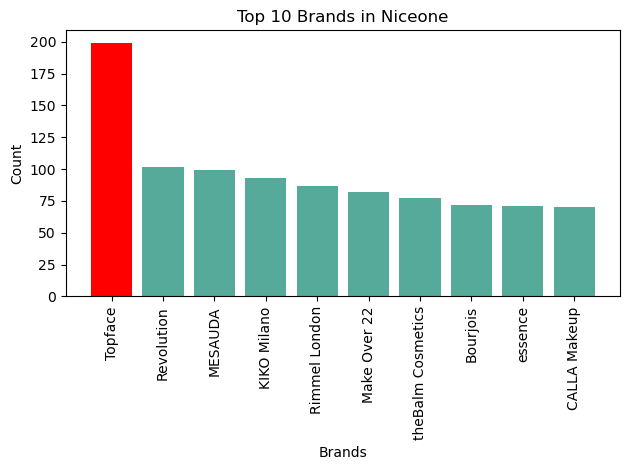

In [596]:

# Assuming 'top_brands' contains the top 10 brands
top_brands = products_data['brand_name'].value_counts().head(10)

# Set colors: red for the top brand and #5A9 for others
colors = ['red'] + ['#5A9'] * (len(top_brands) - 1)

# Plot the bar chart
plt.bar(top_brands.index, top_brands.values, color=colors)

# Customize labels and title
plt.xlabel('Brands')
plt.ylabel('Count')
plt.title('Top 10 Brands in Niceone')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Ensure layout fits well
plt.tight_layout()

# Show the chart
plt.show()


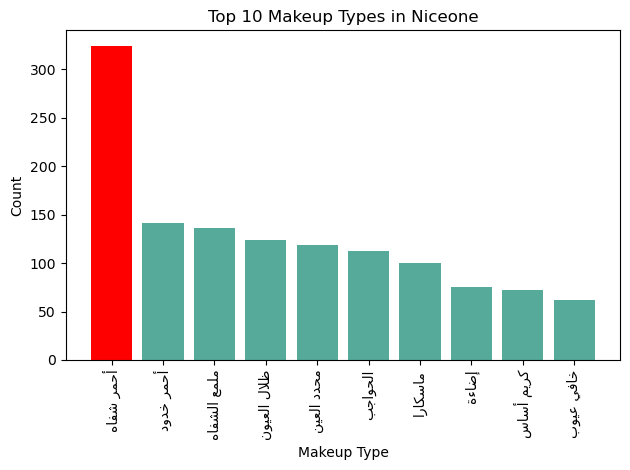

In [597]:

# Filter out "Not Available" from makeup_type
filtered_data = products_data[products_data['makeup_type'] != 'Not Available']

# Get the top 10 makeup types
top_makeup_type = filtered_data['makeup_type'].value_counts().head(10)

# Handle Arabic labels for better display
reshaped_labels = [arabic_reshaper.reshape(label) for label in top_makeup_type.index]
display_labels = [get_display(label) for label in reshaped_labels]

# Set colors: red for the top makeup type and #5A9 for others
colors = ['red'] + ['#5A9'] * (len(top_makeup_type) - 1)

# Plot the bar chart
plt.bar(display_labels, top_makeup_type.values, color=colors)

# Customize labels and title
plt.xlabel('Makeup Type')
plt.ylabel('Count')
plt.title('Top 10 Makeup Types in Niceone')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Ensure layout fits well
plt.tight_layout()

# Show the chart
plt.show()

### 2. Univariate Non-Graphical analysis: 


## 4. Bivariate/Multivariate Analysis:


We could also use a correlation matrix to get more specific information about the relationship between these two variables.

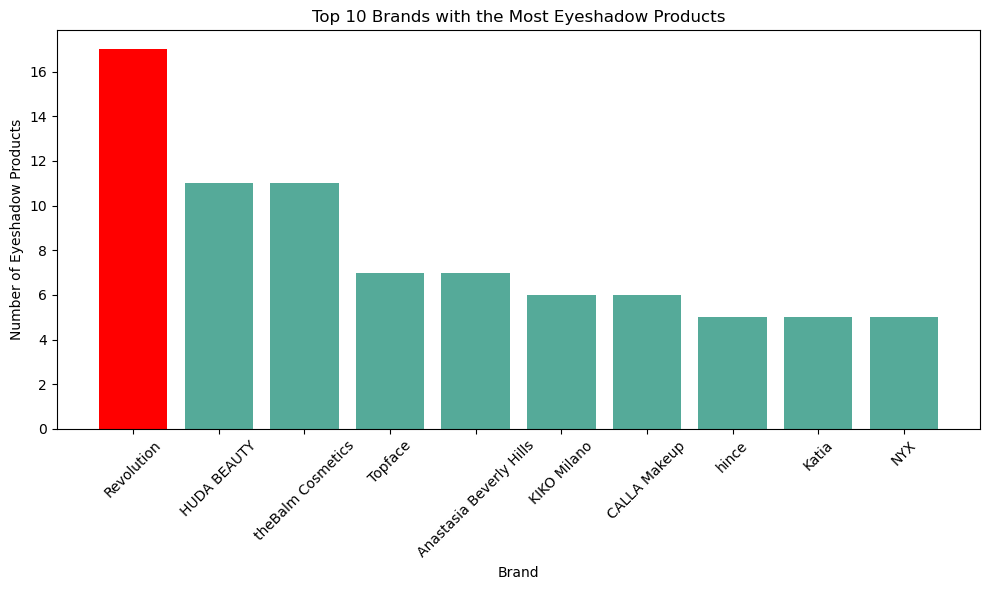

In [598]:
# Filter the data to include only products with makeup_type "ظلال العيون"
eyeshadow_data = products_data[products_data['makeup_type'] == 'ظلال العيون']

# Count the number of eyeshadow products per brand and get the top 10 brands
top_eyeshadow_brands = eyeshadow_data['brand_name'].value_counts().head(10)

# Set colors: red for the top brand and #5A9 for others
colors = ['red'] + ['#5A9'] * (len(top_eyeshadow_brands) - 1)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_eyeshadow_brands.index, top_eyeshadow_brands.values, color=colors)

# Customize labels and title
plt.xlabel('Brand')
plt.ylabel('Number of Eyeshadow Products')
plt.title('Top 10 Brands with the Most Eyeshadow Products')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure layout fits well
plt.tight_layout()

# Show the chart
plt.show()

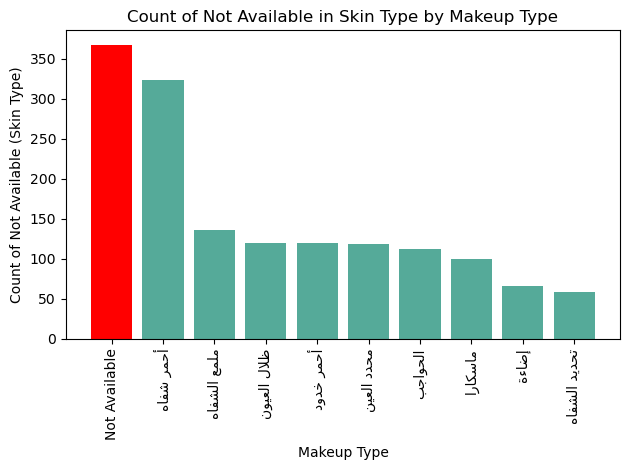

In [599]:
# Filter "Not Available" in skin_type and count by makeup_type
not_available_counts = products_data[products_data['skin_type'] == 'Not Available']['makeup_type'].value_counts().reset_index().head(10)
not_available_counts.columns = ['makeup_type', 'Not Available Count']

# Reshape Arabic labels and get the correct display order
reshaped_labels = [arabic_reshaper.reshape(label) for label in not_available_counts['makeup_type']]
display_labels = [get_display(label) for label in reshaped_labels]

# Set colors: red for the top makeup type and #5A9 for others
colors = ['red'] + ['#5A9'] * (len(not_available_counts) - 1)

# Plot the chart
plt.bar(display_labels, not_available_counts['Not Available Count'], color=colors)
plt.ylabel('Count of Not Available (Skin Type)')
plt.xlabel('Makeup Type')
plt.title('Count of Not Available in Skin Type by Makeup Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.tight_layout()
plt.show()

C:\Users\sakur\AppData\Local\Temp\ipykernel_25428\2201371164.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


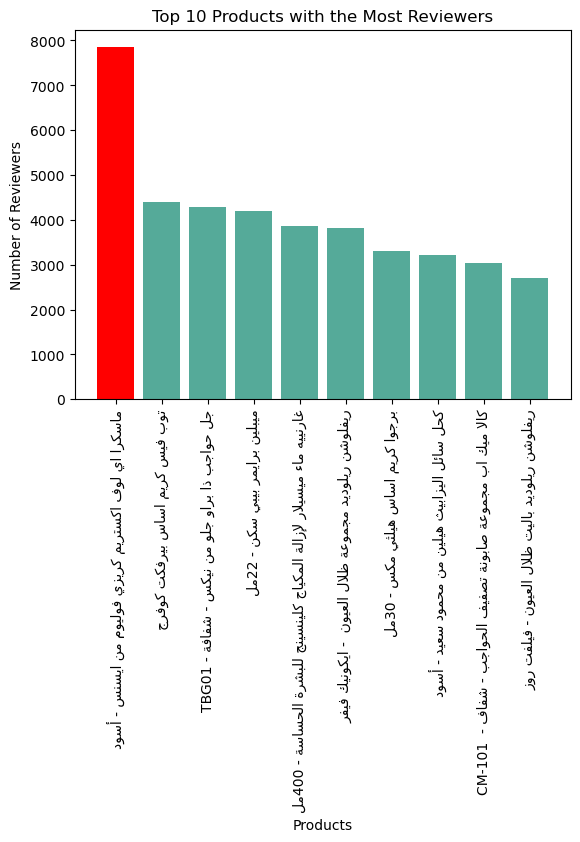

In [600]:
# Count unique reviewers per product and get the top 10
top_products = products_data.groupby('name')['reviews_number'].sum().nlargest(10)

# Reshape Arabic labels and get the correct display order
reshaped_labels = [arabic_reshaper.reshape(label) for label in top_products.index]
display_labels = [get_display(label) for label in reshaped_labels]

# Set colors: red for the top product and #5A9 for others
colors = ['red'] + ['#5A9'] * (len(top_products) - 1)

# Plot the bar chart
plt.bar(display_labels, top_products.values, color=colors)

# Customize labels and title
plt.xlabel('Products')
plt.ylabel('Number of Reviewers')
plt.title('Top 10 Products with the Most Reviewers')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Ensure layout fits well
plt.tight_layout()

# Show the chart
plt.show()

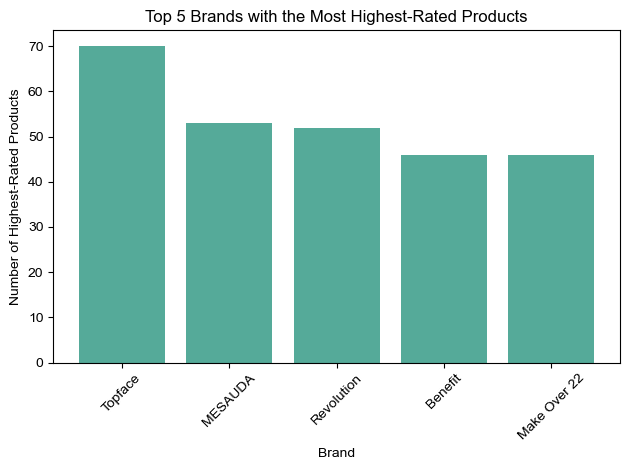

In [ ]:
high_rating_threshold = 5

#Filter products with ratings above the threshold
high_rated_products = products_data[products_data['rating_number'] == high_rating_threshold]

#Group by brand and count the number of highest-rated products
brand_high_rated_count = high_rated_products.groupby('brand_name')['rating_number'].count()

#Get the top 5 brands with the most highest-rated products
top_5_brands = brand_high_rated_count.nlargest(5)

#Plot the bar chart
plt.bar(top_5_brands.index, top_5_brands.values, color='#5A9')

#Customize labels and title
plt.xlabel('Brand')
plt.ylabel('Number of Highest-Rated Products')
plt.title('Top 5 Brands with the Most Highest-Rated Products')

#Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Ensure layout fits well
plt.tight_layout()

#Show the chart
plt.show()

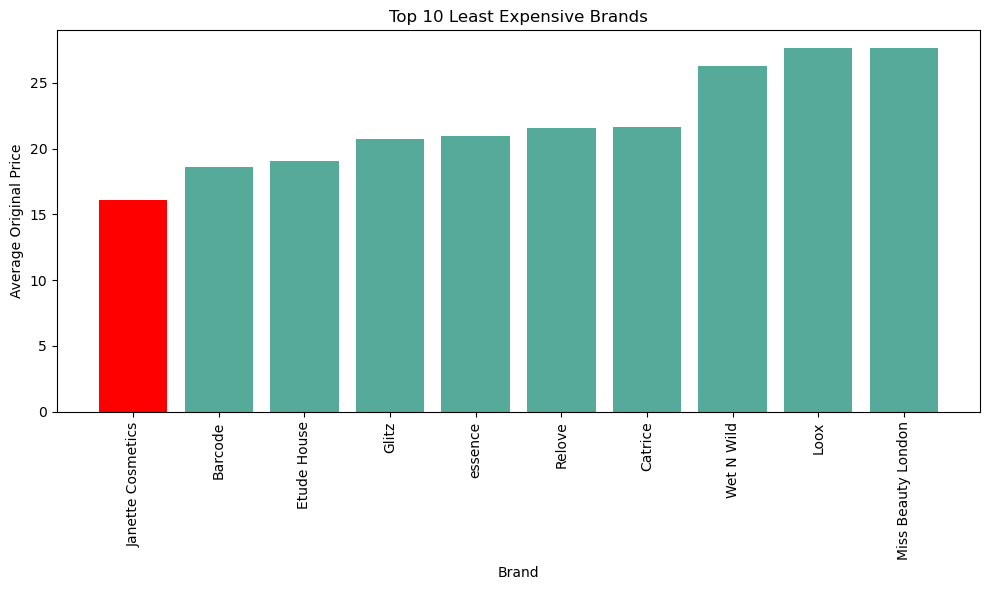

In [601]:
# Calculate the average price for each brand
cheapest_brands = products_data.groupby('brand_name')['original_price'].mean().nsmallest(10)

# Set colors: red for the cheapest brand and #5A9 for others
colors = ['red'] + ['#5A9'] * (len(cheapest_brands) - 1)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(cheapest_brands.index, cheapest_brands.values, color=colors)

# Customize labels and title
plt.xlabel('Brand')
plt.ylabel('Average Original Price')
plt.title('Top 10 Least Expensive Brands')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Ensure layout fits well
plt.tight_layout()

# Show the chart
plt.show()


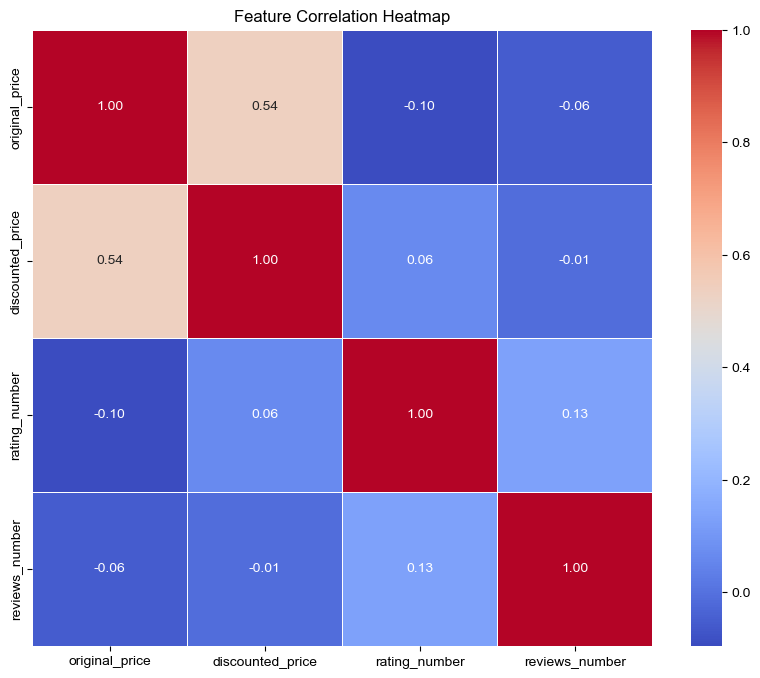

In [ ]:
# Ensure numeric columns for correlation calculation
numeric_data = products_data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Title and display
plt.title('Feature Correlation Heatmap')
plt.show()

---

# Feature Engineering

In [602]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2248 entries, 0 to 2296
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2248 non-null   object 
 1   brand_name        2248 non-null   object 
 2   original_price    2248 non-null   float64
 3   discounted_price  2248 non-null   float64
 4   rating_number     2248 non-null   float64
 5   reviews_number    2248 non-null   int32  
 6   makeup_type       2248 non-null   object 
 7   skin_type         2248 non-null   object 
 8   texture           2248 non-null   object 
dtypes: float64(3), int32(1), object(5)
memory usage: 166.8+ KB


In [603]:
# Dropping name 
products_data = products_data.drop('name', axis = 1)

Creating a column that specifies if the product can be used for more than one purpose. 

In [604]:
def check_multiple_usage(row):
    if '-' not in row['makeup_type']:
        return False
    elif row['makeup_type'].count('-') == 1 and 'ضد الماء' in row['makeup_type']:
        return False
    elif row['makeup_type'].count('-') == 1 and 'ضد الماء' not in row['makeup_type']:
        return True
    elif row['makeup_type'].count('-') > 1:
        return True


In [605]:
products_data['multiple_usage'] = products_data.apply(check_multiple_usage, axis=1)

In [ ]:
# Checking the new column
products_data.head(4)


,brand_name,original_price,discounted_price,rating_number,reviews_number,makeup_type,skin_type,texture,multiple_usage
0,Rimmel London,72.0,54.00,4.9,13,ضد الماء - كريم أساس,Not Available,Not Available,False
1,essence,18.4,15.64,4.9,57,خافي عيوب,Not Available,كريمي,False
2,Flormar,33.0,24.75,4.8,8,أحمر خدود,Not Available,Not Available,False
3,Revolution,96.0,62.40,5.0,2531,أحمر خدود - إضاءة - تسمير,Not Available,بودرة,True


Checking for least repeated values 

In [608]:
pd.set_option('display.max_rows', None)
products_data['makeup_type'].value_counts()

makeup_type
Not Available                                                                  408
أحمر شفاه                                                                      324
أحمر خدود                                                                      141
ملمع الشفاه                                                                    136
ظلال العيون                                                                    124
محدد العين                                                                     119
الحواجب                                                                        112
ماسكارا                                                                        100
إضاءة                                                                           75
كريم أساس                                                                       72
خافي عيوب                                                                       62
تحديد الشفاه                                                               

Removing values that were repeated less than three times

In [672]:
# Columns to filter
columns_to_filter = ['brand_name', 'makeup_type', 'skin_type', 'texture']

# Get valid values where occurrences > 2 for each column
filtered_indices = {col: products_data[col].value_counts()[products_data[col].value_counts() > 3].index for col in columns_to_filter}

# Apply all filters dynamically
products_data_v1 = products_data[
    products_data.apply(lambda row: all(row[col] in filtered_indices[col] for col in columns_to_filter), axis=1)
]


## Encoding Categorical Features

### Frequency Encoding

In [609]:
products_data_v1 = products_data_v1.copy()
freq_encoding = products_data_v1['makeup_type'].value_counts() / len(products_data_v1)
products_data_v1.loc[:, 'makeup_type_encoded'] = products_data_v1['makeup_type'].map(freq_encoding)

In [610]:
products_data_v1['makeup_type'].value_counts().shape

(35,)

In [611]:
products_data_v1['makeup_type_encoded'].value_counts().shape

(29,)

In [ ]:
# missed information -> some makeup types were not added or were added to other types 
products_data_v1['makeup_type'].value_counts()

makeup_type
Not Available                      352
أحمر شفاه                          322
أحمر خدود                          136
ملمع الشفاه                        132
ظلال العيون                        121
محدد العين                         114
الحواجب                            109
ماسكارا                             91
إضاءة                               73
كريم أساس                           64
خافي عيوب                           59
تحديد الشفاه                        58
برايمر                              53
ضد الماء - محدد العين               52
بودرة تثبيت                         51
تحديد الشفاه - ضد الماء             36
الحواجب - ضد الماء                  32
أحمر شفاه - ضد الماء                22
كنتور                               21
ضد الماء - ماسكارا                  20
تسمير                               19
ضد الماء - كريم أساس                19
الحواجب - ماسكارا                   15
أحمر خدود - ضد الماء                13
خافي عيوب - ضد الماء                10
أحمر خدود - إ

In [613]:
products_data_v1['makeup_type_encoded'].value_counts()

makeup_type_encoded
0.171290    352
0.156691    322
0.066180    136
0.064234    132
0.058881    121
0.055474    114
0.053041    109
0.044282     91
0.035523     73
0.031144     64
0.028710     59
0.028224     58
0.025791     53
0.025304     52
0.024818     51
0.009246     38
0.017518     36
0.015572     32
0.010706     22
0.010219     21
0.004866     20
0.009732     20
0.002920     18
0.007299     15
0.002433     15
0.006326     13
0.003893      8
0.003406      7
0.001460      3
Name: count, dtype: int64

In [614]:
products_data_v1 = products_data_v1.copy()
freq_encoding = products_data_v1['skin_type'].value_counts() / len(products_data_v1)
products_data_v1.loc[:, 'skin_type_encoded'] = products_data_v1['skin_type'].map(freq_encoding)

In [615]:
products_data_v1['skin_type'].value_counts().shape

(10,)

In [616]:
products_data_v1['skin_type_encoded'].value_counts().shape

(7,)

In [617]:
products_data_v1['skin_type'].value_counts()

skin_type
Not Available                             1873
جافة - حساسة - دهنية - طبيعية - مختلطة     107
جافة - دهنية - طبيعية - مختلطة              42
دهنية - مختلطة                               8
دهنية - طبيعية - مختلطة                      5
جافة - حساسة                                 5
جافة - طبيعية                                5
حساسة - دهنية - طبيعية - مختلطة              4
حساسة                                        4
جافة - حساسة - طبيعية - مختلطة               2
Name: count, dtype: int64

In [618]:
products_data_v1['skin_type_encoded'].value_counts()

skin_type_encoded
0.911436    1873
0.052068     107
0.020438      42
0.002433      15
0.001946       8
0.003893       8
0.000973       2
Name: count, dtype: int64

In [619]:
products_data_v1 = products_data_v1.copy()
freq_encoding = products_data_v1['texture'].value_counts() / len(products_data_v1)
products_data_v1.loc[:, 'texture_encoded'] = products_data_v1['texture'].map(freq_encoding)

In [620]:
products_data_v1['texture'].shape

(2055,)

In [621]:
products_data_v1['texture_encoded'].shape

(2055,)

In [622]:
products_data_v1['texture'].value_counts()

texture
Not Available           535
سائل                    516
كريمي                   393
بودرة                   271
قلم - كريمي             106
جــل                     50
بودرة حرة                41
قلم                      37
بخاخ                     25
زيت                      15
ستيك - كريمي             14
بودرة مضغوطة             13
بخاخ - سائل               8
بودرة - بودرة مضغوطة      8
بودرة - بودرة حرة         6
سائل - كريمي              6
بودرة - جــل              5
بخاخ - مائي               4
سيروم                     2
Name: count, dtype: int64

In [623]:
products_data_v1['texture_encoded'].value_counts()

texture_encoded
0.260341    535
0.251095    516
0.191241    393
0.131873    271
0.051582    106
0.024331     50
0.019951     41
0.018005     37
0.012165     25
0.003893     16
0.007299     15
0.006813     14
0.006326     13
0.002920     12
0.002433      5
0.001946      4
0.000973      2
Name: count, dtype: int64

In [624]:
products_data_v1 = products_data_v1.copy()
freq_encoding = products_data_v1['brand_name'].value_counts() / len(products_data_v1)
products_data_v1.loc[:, 'brand_name_encoded'] = products_data_v1['brand_name'].map(freq_encoding)

In [625]:
products_data_v1['brand_name'].value_counts().shape

(66,)

In [626]:
products_data_v1['brand_name_encoded'].value_counts().shape

(45,)

In [627]:
products_data_v1['brand_name'].value_counts()

brand_name
Topface                    190
Revolution                  96
MESAUDA                     95
KIKO Milano                 89
Rimmel London               81
Make Over 22                76
Bourjois                    72
theBalm Cosmetics           68
CALLA Makeup                67
essence                     66
Benefit                     64
NYX                         61
Catrice                     51
NOTE Cosmetique             48
Real Techniques             47
Flormar                     47
Maybelline                  45
Sheglam                     44
MAKE UP FOR EVER            42
NORA BO AWADH               39
Relove                      38
INGLOT                      37
Beauty Creations            34
BH cosmetics                30
Katia                       29
FENTY BEAUTY                28
LA Girl                     27
HUDA BEAUTY                 26
Lottie                      26
Anastasia Beverly Hills     25
Dior                        25
LOreal Paris                

In [628]:
products_data_v1['brand_name_encoded'].value_counts()

brand_name_encoded
0.092457    190
0.046715     96
0.046229     95
0.022871     94
0.043309     89
0.039416     81
0.036983     76
0.035036     72
0.033090     68
0.032603     67
0.032117     66
0.031144     64
0.029684     61
0.012652     52
0.024818     51
0.012165     50
0.023358     48
0.021898     45
0.021411     44
0.006813     42
0.020438     42
0.018978     39
0.018491     38
0.018005     37
0.005839     36
0.008759     36
0.016545     34
0.007786     32
0.014599     30
0.014112     29
0.013625     28
0.013139     27
0.002433     25
0.005353     22
0.009732     20
0.001946     20
0.009246     19
0.002920     18
0.007299     15
0.003406     14
0.006326     13
0.004866     10
0.004380      9
0.003893      8
0.001460      3
Name: count, dtype: int64

Checking for encoded columns

In [33]:
products_data_v1.head()

,brand_name,original_price,discounted_price,rating_number,reviews_number,makeup_type,skin_type,texture,multiple_usage,makeup_type_encoded,skin_type_encoded,texture_encoded,brand_name_encoded
0,Rimmel London,72.0,54.00,4.9,13,ضد الماء - كريم أساس,Not Available,Not Available,False,0.009246,0.911436,0.260341,0.039416
1,essence,18.4,15.64,4.9,57,خافي عيوب,Not Available,كريمي,False,0.028710,0.911436,0.191241,0.032117
2,Flormar,33.0,24.75,4.8,8,أحمر خدود,Not Available,Not Available,False,0.066180,0.911436,0.260341,0.022871
3,Revolution,96.0,62.40,5.0,2531,أحمر خدود - إضاءة - تسمير,Not Available,بودرة,True,0.003893,0.911436,0.131873,0.046715
4,Topface,43.0,16.50,4.9,375,أحمر شفاه,Not Available,كريمي,False,0.156691,0.911436,0.191241,0.092457


Saving the new dataset in a new variable

In [629]:
products_data_v2 = products_data_v1.copy()

In [674]:
products_data_v2.columns

Index(['original_price', 'discounted_price', 'rating_number', 'reviews_number',
       'multiple_usage', 'makeup_type_encoded', 'skin_type_encoded',
       'texture_encoded', 'brand_name_encoded'],
      dtype='object')

In [631]:
# Dropping categorical features
products_data_v2 = products_data_v1.drop(['brand_name', 'makeup_type', 'skin_type', 'texture'],axis=1)

In [632]:
products_data_v2.shape

(2055, 9)

# Feature Selections

In [ ]:
selector = SelectKBest(score_func=mutual_info_classif, k=5)

kmeans_temp = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X_scaled)
pseudo_labels = kmeans_temp.labels_

selected_feature_indices = selector.get_support(indices=True)

print("Selected feature indices:", selected_feature_indices)

Selected feature indices: [0 1 3 5 8]


In [ ]:
# Checking the selected features
products_data_v2.head(1)

# The selected features: [original_price, discounted_price, reviews_number, makeup_type_encoded, brand_name_encoded]

,original_price,discounted_price,rating_number,reviews_number,multiple_usage,makeup_type_encoded,skin_type_encoded,texture_encoded,brand_name_encoded
0,72.0,54.0,4.9,13,False,0.009246,0.911436,0.260341,0.039416


---

# Preparing Training Set

In [695]:
X = products_data_v2

# Keeping the selected features
X = X.drop(['rating_number', 'multiple_usage', 'skin_type_encoded', 'skin_type_encoded', 'texture_encoded'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Shape after keeping the selected features
X.shape

(2055, 5)

In [688]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

In [ ]:
reduced_data = selector.fit_transform(X_scaled, pseudo_labels)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(reduced_data)

sil_score = silhouette_score(reduced_data, clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.4069203041591029


## Defining Clusters Characterstics

Converting the values back from frequency encoding to define clusters characterstics

In [ ]:
# Frequency encoding
freq_encoding = products_data_v1['brand_name'].value_counts() / len(products_data_v1)


# Create an inverse mapping
inverse_mapping = {v: k for k, v in freq_encoding.items()}

# Revert back to original brand names
X['brand_name_reverted'] = X['brand_name_encoded'].map(inverse_mapping)

In [ ]:
# Frequency encoding
freq_encoding = products_data_v1['makeup_type'].value_counts() / len(products_data_v1)


# Create an inverse mapping
inverse_mapping = {v: k for k, v in freq_encoding.items()}

# Revert back to original brand names
X['makeup_type'] = X['makeup_type_encoded'].map(inverse_mapping)

In [499]:
X['cluster'] = clusters

### First Cluster
Affordable essentials 

In [502]:
X[X['cluster'] == 0].describe()

,original_price,discounted_price,reviews_number,makeup_type_encoded,brand_name_encoded,cluster
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.0
mean,61.966818,24.722555,65.198182,0.039553,0.026783,0.0
std,38.193388,23.811690,157.346817,0.020197,0.013103,0.0
min,9.000000,0.000000,0.000000,0.001460,0.001946,0.0
25%,32.000000,0.000000,2.000000,0.025304,0.016545,0.0
50%,55.000000,20.750000,16.000000,0.044282,0.029684,0.0
75%,80.622500,41.302500,58.000000,0.058881,0.036983,0.0
max,245.000000,104.900000,1641.000000,0.066180,0.046715,0.0


In [ ]:
# Affordable essentials 
X[X['cluster'] == 0].describe(include='object')

,brand_name_reverted,makeup_type_reverted
count,1100,1100
unique,40,27
top,Revolution,محدد العين
freq,73,102


In [513]:
X[X['cluster'] == 0]['makeup_type_reverted'].value_counts()

makeup_type_reverted
محدد العين                   102
ملمع الشفاه                   99
الحواجب                       96
أحمر خدود                     94
ظلال العيون                   87
ماسكارا                       86
تحديد الشفاه                  57
خافي عيوب                     51
إضاءة                         51
ضد الماء - محدد العين         50
كريم أساس                     41
بودرة تثبيت                   41
برايمر                        39
ضد الماء - كريم أساس          27
أحمر شفاه - ضد الماء          22
الحواجب - ضد الماء            20
أحمر خدود - إضاءة             19
أحمر خدود - أحمر شفاه         18
تحديد الشفاه - ضد الماء       17
كنتور                         16
ضد الماء - ماسكارا            16
بي بي كريم                    14
أحمر خدود - ضد الماء          13
الحواجب - ماسكارا             10
أحمر شفاه - ملمع الشفاه        7
أحمر خدود - إضاءة - تسمير      6
برايمر - ضد الماء              1
Name: count, dtype: int64

In [501]:
X[X['cluster'] == 0]['brand_name_reverted'].value_counts()

brand_name_reverted
Revolution           73
KIKO Milano          66
MESAUDA              60
essence              53
NYX                  53
Rimmel London        51
Bourjois             48
Make Over 22         46
Catrice              42
NOTE Cosmetique      40
Sheglam              38
Relove               37
CALLA Makeup         36
theBalm Cosmetics    35
Flormar              35
Maybelline           33
Benefit              32
Lottie               29
Beauty Creations     27
LA Girl              25
Katia                21
Charlotte Tilbury    20
MAC                  19
Carissa Cosmetics    18
INGLOT               17
NABLA                17
NORA BO AWADH        16
LOreal Paris         15
KRYOLAN              13
FENTY BEAUTY         13
WBCo                 12
Revlon               10
Barcode              10
Dior                  9
Clarins               8
Dasique               8
Jockey                7
MAKE UP FOR EVER      4
Garnier               3
Sisley                1
Name: count, dtype: 

### The Second Cluster
Affordable Essentials and Tools 

In [ ]:
# affordable Essentials and tools 
X[X['cluster'] == 1].describe()

,original_price,discounted_price,reviews_number,makeup_type_encoded,brand_name_encoded,cluster
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.0
mean,71.378493,26.901526,94.426471,0.164527,0.024244,1.0
std,41.961482,26.508555,235.330257,0.007286,0.013699,0.0
min,10.000000,0.000000,0.000000,0.156691,0.001946,1.0
25%,39.975000,0.000000,2.000000,0.156691,0.014477,1.0
50%,65.000000,21.240000,15.000000,0.171290,0.022871,1.0
75%,98.000000,48.075000,61.000000,0.171290,0.035036,1.0
max,265.000000,119.000000,1710.000000,0.171290,0.046715,1.0


In [504]:
X[X['cluster'] == 1].describe(include='object')

,brand_name_reverted,makeup_type_reverted
count,544,544
unique,41,2
top,Flormar,Not Available
freq,59,292


In [ ]:
X[X['cluster'] == 1]['makeup_type_reverted'].value_counts()

makeup_type_reverted
Not Available    292
أحمر شفاه        252
Name: count, dtype: int64

In [503]:

X[X['cluster'] == 1]['brand_name_reverted'].value_counts()

brand_name_reverted
Flormar              59
MESAUDA              34
BH cosmetics         30
Rimmel London        29
CALLA Makeup         28
Make Over 22         28
theBalm Cosmetics    28
NORA BO AWADH        23
KIKO Milano          22
Bourjois             21
Revolution           17
INGLOT               16
MAKE UP FOR EVER     13
Revlon               12
KRYOLAN              12
essence              11
Maybelline           11
NABLA                10
MAC                  10
Garnier              10
Jockey               10
Clarins              10
girlactik             9
Catrice               9
NOTE Cosmetique       8
KSD                   8
Katia                 8
Beauty Creations      7
Sheglam               6
NYX                   6
WBCo                  6
Carissa Cosmetics     5
Dasique               5
LOreal Paris          5
Dior                  4
Lottie                4
Charlotte Tilbury     4
Sisley                3
LA Girl               1
Relove                1
Benefit             

### The Third Cluster
Luxury Essentials

In [ ]:
# Luxury essentials 
X[X['cluster'] == 2].describe()

,original_price,discounted_price,reviews_number,makeup_type_encoded,brand_name_encoded,cluster
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.0
mean,205.781346,142.948269,68.307692,0.063855,0.016456,2.0
std,76.246199,63.971259,190.798074,0.052529,0.010000,0.0
min,107.000000,0.000000,0.000000,0.001460,0.001460,2.0
25%,157.000000,116.737500,2.000000,0.028710,0.008759,2.0
50%,188.445000,146.700000,13.500000,0.058881,0.012652,2.0
75%,222.317500,180.125000,44.250000,0.066180,0.020438,2.0
max,558.000000,427.000000,1636.000000,0.171290,0.046715,2.0


In [ ]:
X[X['cluster'] == 2].describe(include='object')

,brand_name_reverted,makeup_type_reverted
count,208,208
unique,23,22
top,Dior,Not Available
freq,37,31


In [515]:
X[X['cluster'] == 2]['makeup_type_reverted'].value_counts()

makeup_type_reverted
Not Available                31
ظلال العيون                  25
أحمر خدود                    23
ملمع الشفاه                  21
إضاءة                        18
كريم أساس                    15
الحواجب - ضد الماء           12
ضد الماء - كريم أساس         10
برايمر                        9
بودرة تثبيت                   8
خافي عيوب                     7
أحمر شفاه                     6
الحواجب                       5
ضد الماء - ماسكارا            4
محدد العين                    3
ماسكارا                       3
برايمر - ضد الماء             2
كنتور                         2
الحواجب - ماسكارا             1
أحمر خدود - إضاءة - تسمير     1
تحديد الشفاه                  1
أحمر خدود - إضاءة             1
Name: count, dtype: int64

In [508]:
X[X['cluster'] == 2]['brand_name_reverted'].value_counts()

brand_name_reverted
Dior                 37
Benefit              31
MAKE UP FOR EVER     25
Lottie               19
Charlotte Tilbury    18
FENTY BEAUTY         15
Carissa Cosmetics    13
Sisley               11
MAC                   7
theBalm Cosmetics     5
NABLA                 5
INGLOT                4
Jockey                3
Givenchy              3
CALLA Makeup          2
Revolution            2
Bourjois              2
Clarins               1
KIKO Milano           1
LA Girl               1
MESAUDA               1
NYX                   1
Make Over 22          1
Name: count, dtype: int64

### The Fourth Cluster
Low-cost Essentials

In [517]:
# low-cost essentials
X[X['cluster'] == 3].describe()

,original_price,discounted_price,reviews_number,makeup_type_encoded,brand_name_encoded,cluster
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.0
mean,46.582562,17.343695,439.660099,0.096667,0.088754,3.0
std,14.923182,8.807108,955.580264,0.061711,0.014503,0.0
min,13.000000,7.000000,3.000000,0.002433,0.003406,3.0
25%,37.000000,13.200000,67.500000,0.039903,0.092457,3.0
50%,48.000000,16.500000,143.000000,0.066180,0.092457,3.0
75%,55.000000,19.200000,320.000000,0.156691,0.092457,3.0
max,140.000000,91.000000,7849.000000,0.171290,0.092457,3.0


In [510]:
X[X['cluster'] == 3].describe(include='object')

,brand_name_reverted,makeup_type_reverted
count,203,203
unique,10,20
top,Topface,أحمر شفاه
freq,190,64


In [518]:
X[X['cluster'] == 3]['makeup_type_reverted'].value_counts()

makeup_type_reverted
أحمر شفاه                    64
Not Available                29
أحمر خدود                    19
تحديد الشفاه - ضد الماء      19
ملمع الشفاه                  12
محدد العين                    9
ظلال العيون                   9
كريم أساس                     8
الحواجب                       8
برايمر                        5
الحواجب - ماسكارا             4
إضاءة                         4
كنتور                         3
ماسكارا                       2
بودرة تثبيت                   2
ضد الماء - محدد العين         2
ضد الماء - كريم أساس          1
خافي عيوب                     1
بي بي كريم                    1
أحمر خدود - إضاءة - تسمير     1
Name: count, dtype: int64

In [511]:
X[X['cluster'] == 3]['brand_name_reverted'].value_counts()

brand_name_reverted
Topface          190
Revolution         4
essence            2
NYX                1
Garnier            1
Bourjois           1
CALLA Makeup       1
Rimmel London      1
Maybelline         1
Make Over 22       1
Name: count, dtype: int64

---

## Trying K-means and DBSCAN 

Checking the features with kmeans

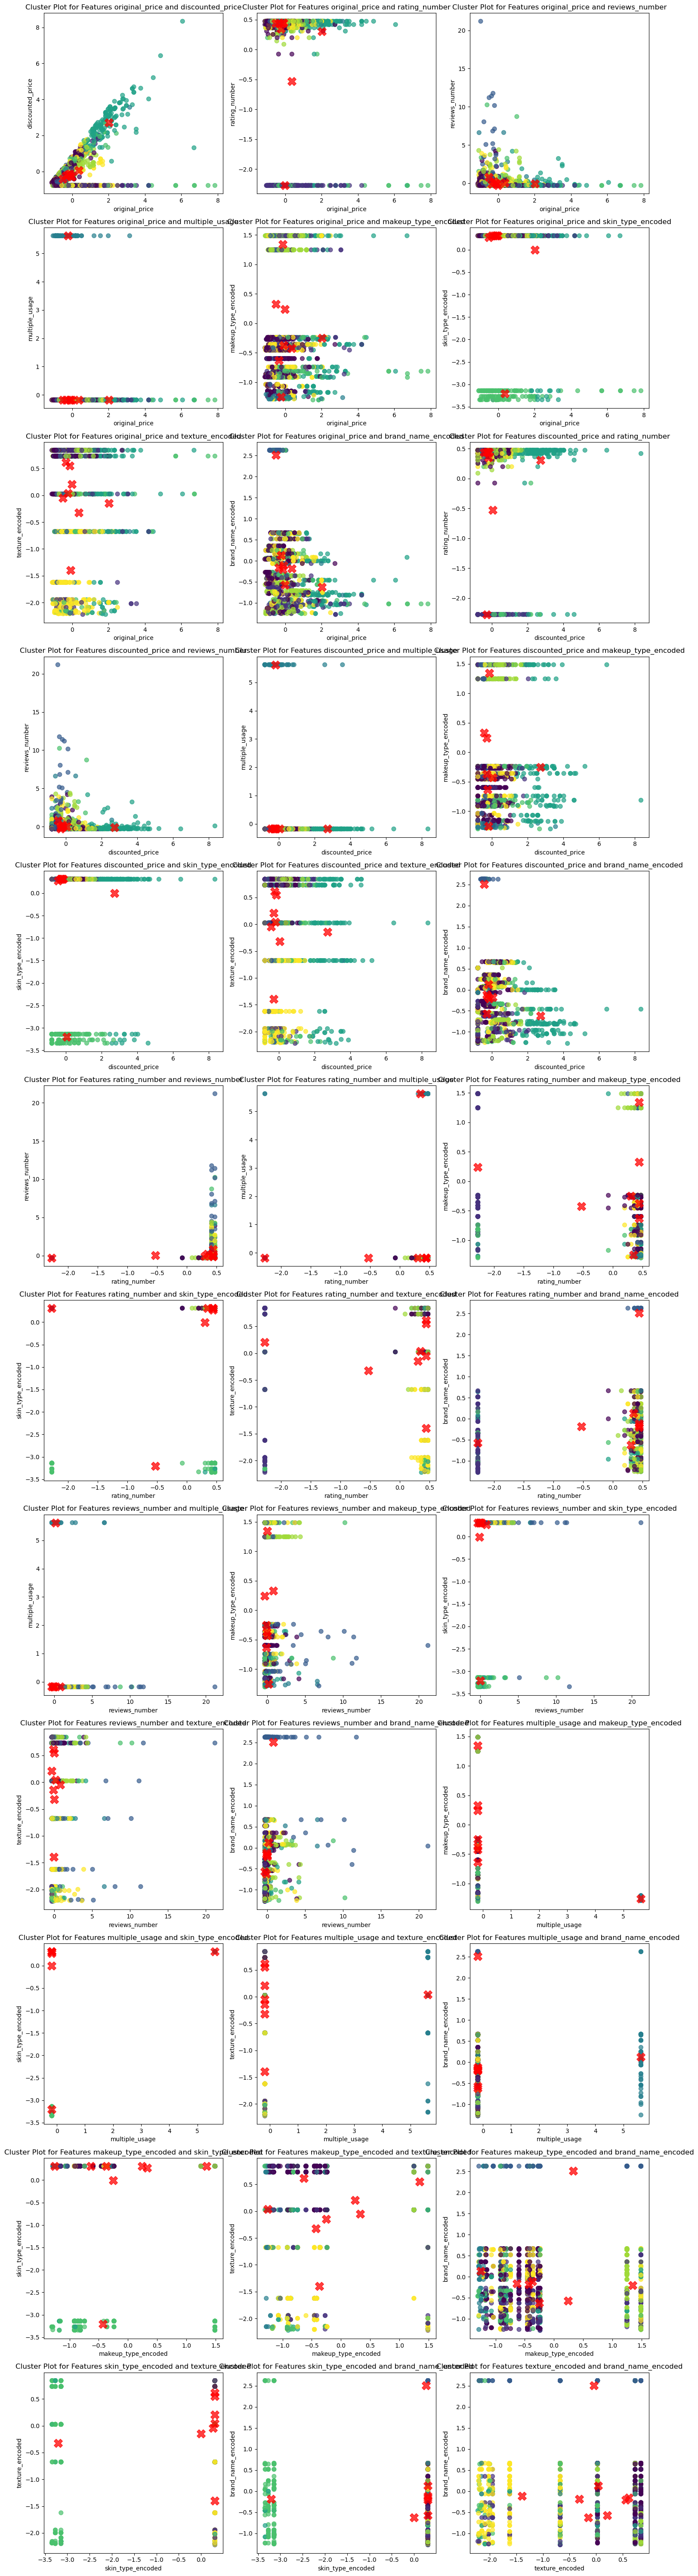

In [ ]:
#and clusters is the cluster labels from the KMeans model
features = ['original_price', 'discounted_price', 'rating_number', 'reviews_number',
            'multiple_usage', 'makeup_type_encoded', 'skin_type_encoded',
            'texture_encoded', 'brand_name_encoded']

#Step 1: Perform KMeans clustering on your scaled data
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#Step 2: Plot the clusters for each pair of features
#Generate all unique pairs of columns from the features list
feature_combinations = [(i, j) for i in range(X_scaled.shape[1]) for j in range(i + 1, X_scaled.shape[1])]

#Set up the plot grid size based on the number of combinations
num_combinations = len(feature_combinations)
rows = num_combinations // 3 + (num_combinations % 3 > 0)
plt.figure(figsize=(15, 5 * rows))

#Plot each combination of feature pairs
for i, (f1, f2) in enumerate(feature_combinations):
    plt.subplot(rows, 3, i + 1)

    #Scatter plot for the pair of features
    plt.scatter(X_scaled[:, f1], X_scaled[:, f2], c=clusters, s=50, cmap='viridis', alpha=0.7)

    #Plot the cluster centers
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, f1], centers[:, f2], c='red', s=200, alpha=0.75, marker='X')

    #Add title and labels
    plt.title(f'Cluster Plot for Features {features[f1]} and {features[f2]}')
    plt.xlabel(features[f1])
    plt.ylabel(features[f2])

#Show the plot
plt.tight_layout()
plt.show()

In [ ]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

In [169]:
wcss

[20550.000000000004,
 17340.26742294405,
 15060.981273410178,
 13115.355606762705,
 10969.4924830844,
 9192.064657856985,
 7975.623552692284,
 6876.288606692854,
 6102.1797519553165,
 5778.830479337517,
 5499.012919484692,
 5275.046807652434,
 5061.642555969585,
 4849.0548440045,
 4688.029661880169,
 4479.215392845722,
 4354.567812475701,
 4207.68132361087,
 4037.911935901654]

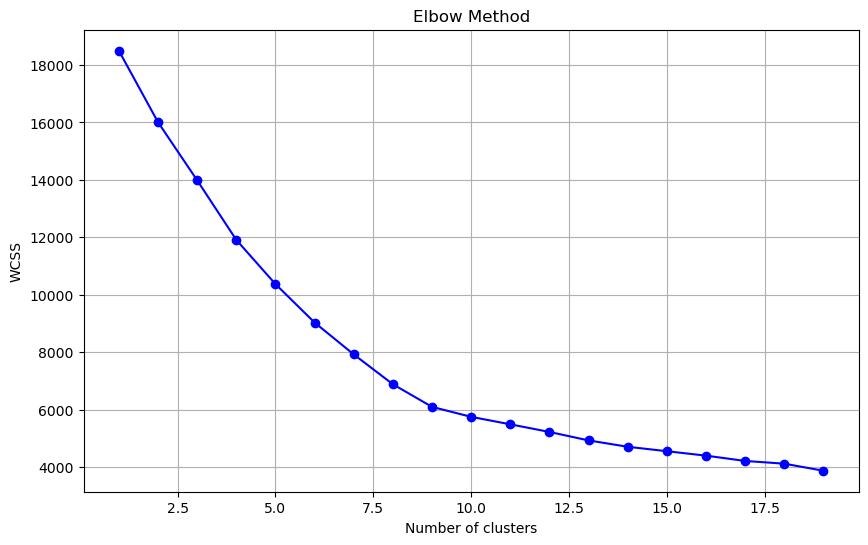

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [130]:
optimal_clusters = 9 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Training the K-means Model

### K-means Model

In [131]:
y_pred = model.fit_predict(X_scaled)

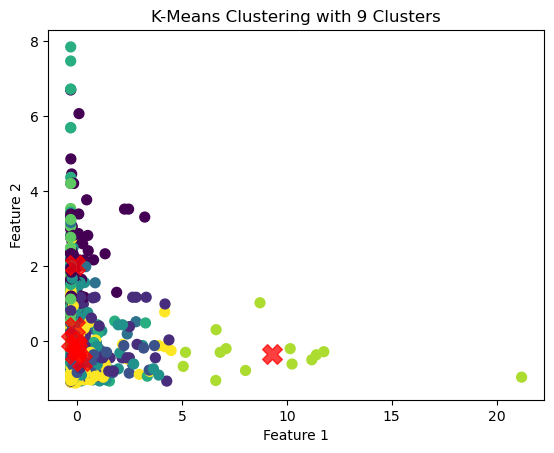

In [136]:
plt.scatter(X_scaled[:,3], X_scaled[:,0], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 3], centers[:, 0], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

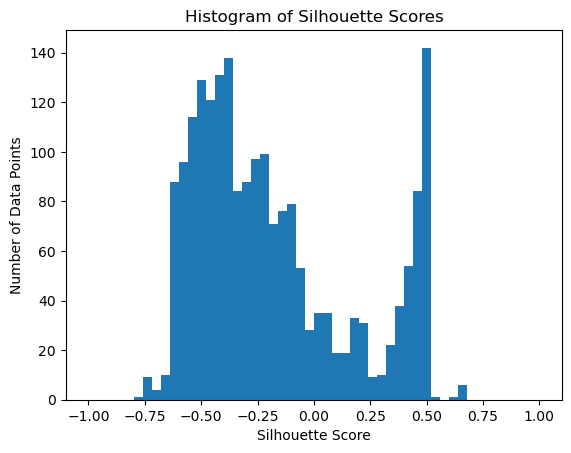

Silhouette average score: -0.1789129677691495


In [ ]:
# Select only numerical columns from the DataFrame
X_numerical = X.select_dtypes(include=[np.number])

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X_numerical, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X_numerical, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [123]:
X['kmeans'] = y_pred

In [124]:
X['kmeans'].value_counts()

kmeans
1    802
0    417
3    264
5    174
6    164
2    159
4     61
7     14
Name: count, dtype: int64

### DBSCAN

In [241]:
# Keeping the selected features
X = X.drop(['rating_number', 'multiple_usage', 'skin_type_encoded', 'skin_type_encoded', 'texture_encoded'], axis=1)

In [243]:
# Prepare data
#X = products_data_v2


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [244]:
X.shape

(2055, 5)

In [142]:
X.head()

,original_price,discounted_price,reviews_number,makeup_type_encoded,brand_name_encoded
0,72.0,54.00,13,0.009246,0.039416
1,18.4,15.64,57,0.028710,0.032117
2,33.0,24.75,8,0.066180,0.022871
3,96.0,62.40,2531,0.003893,0.046715
4,43.0,16.50,375,0.156691,0.092457


##  Building the model

In [391]:
min_samples = 6

In [392]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [393]:
indices

array([[ 105,  470,  463,  221,    0,  225],
       [   1, 1299, 1544, 1077, 1356,  460],
       [   2,  963,   75, 1132, 1563, 1376],
       ...,
       [2052,  621,  529, 1980, 1908, 1531],
       [2053, 2029,  618,  261,  655, 1302],
       [2054,  537,  466,  796, 1999,  630]], dtype=int64)

In [394]:
distances[:,min_samples-1]

array([0.        , 0.12886851, 0.18515238, ..., 0.09858436, 0.24613883,
       0.26399046])

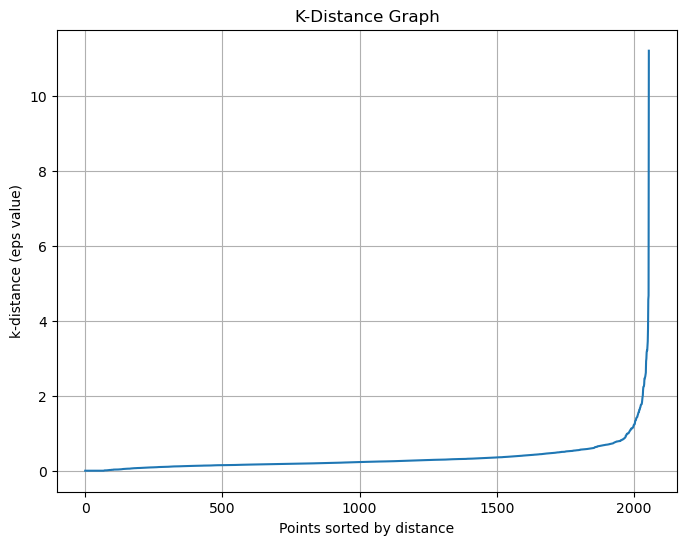

In [395]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [410]:
chosen_eps = 1.50
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

## Training the model

In [411]:
clusters = dbscan.fit_predict(X_scaled)

In [412]:
pd.set_option('display.max_rows', 12)
pd.Series(clusters).value_counts()

 0    1844
 1     187
-1      20
 2       4
Name: count, dtype: int64

## Evaluating the model

In [413]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

0.24163636298083727

In [287]:
X.head()

,original_price,discounted_price,reviews_number,makeup_type_encoded,brand_name_encoded
0,72.0,54.00,13,0.009246,0.039416
1,18.4,15.64,57,0.028710,0.032117
2,33.0,24.75,8,0.066180,0.022871
3,96.0,62.40,2531,0.003893,0.046715
4,43.0,16.50,375,0.156691,0.092457


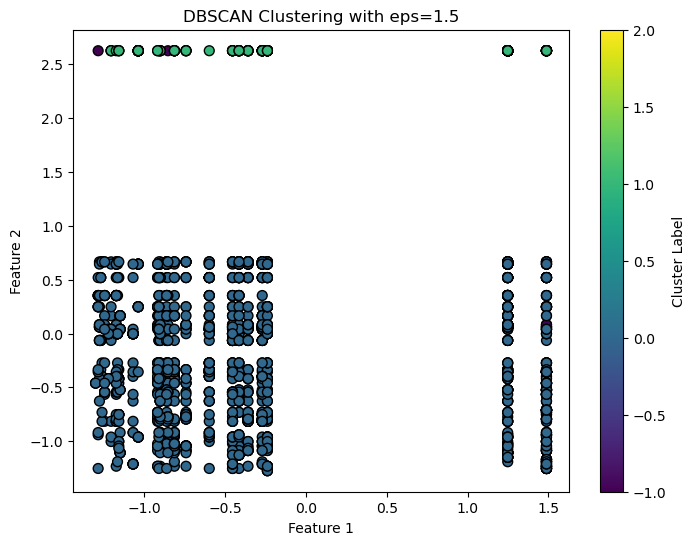

In [414]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 3], X_scaled[:, 4], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

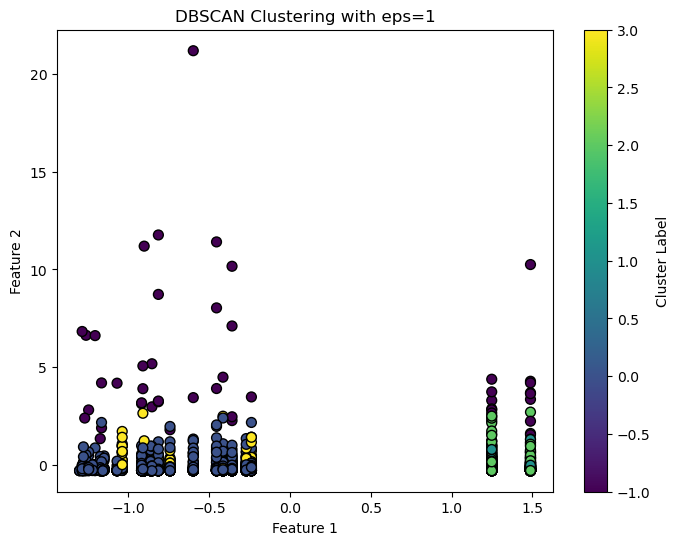

In [401]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 3], X_scaled[:, 2], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [174]:
X['dbscan'] = clusters

In [175]:
X['dbscan'].value_counts()

dbscan
 0    1802
 2     178
 1      60
-1      15
Name: count, dtype: int64

<Axes: xlabel='original_price', ylabel='brand_name_encoded'>

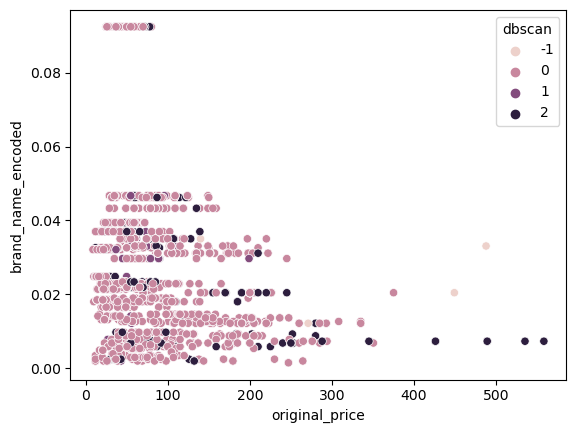

In [176]:
sns.scatterplot(data = X , x = 'original_price', y = 'brand_name_encoded', hue = 'dbscan')


---

### Authors

- Munirah Alzuman
- Raghad Alharbi
- Tahani AlOtabi
- Yaqeen Alhalal